In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Install YOLOv8 and other dependencies
!pip install ultralytics matplotlib pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 905.3/905.3 kB 52.8 MB/s eta 0:00:00


In [3]:
# Navigate to Colab's working directory
import os
os.chdir('/content')

In [4]:
# Unzip the dataset from Google Drive into Colab's content folder
!unzip -q "/content/drive/MyDrive/HUMANFALLDETECTION/human_fall_detection.zip" -d "human_fall_detection"

# Verify contents of the unzipped folder
os.chdir('human_fall_detection')
!ls

data.yaml  test  train	valid


In [5]:
# Import necessary libraries
from ultralytics import YOLO
import matplotlib.pyplot as plt
import pandas as pd

# Train YOLOv8
# Update paths to match your dataset
data_yaml = "/content/human_fall_detection/data.yaml"
model = YOLO('yolov8n.pt')
model.train(data=data_yaml, epochs=10, imgsz=640)  # Adjust epochs and img_size as required

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 333MB/s]


Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/human_fall_detection/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, 

100%|██████████| 755k/755k [00:00<00:00, 119MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 315MB/s]


AMP: checks passed ✅


train: Scanning /content/human_fall_detection/train/labels... 3567 images, 864 backgrounds, 0 corrupt: 100%|██████████| 3567/3567 [00:02<00:00, 1244.98it/s]


train: New cache created: /content/human_fall_detection/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.24 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/human_fall_detection/valid/labels... 1021 images, 250 backgrounds, 0 corrupt: 100%|██████████| 1021/1021 [00:01<00:00, 1013.56it/s]

val: New cache created: /content/human_fall_detection/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.26G       1.38      3.223      1.799         13        640: 100%|██████████| 223/223 [00:23<00:00,  9.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.93it/s]


                   all       1021        812      0.356      0.416      0.317      0.144

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.23G       1.54      2.357      1.915         10        640: 100%|██████████| 223/223 [00:20<00:00, 10.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.71it/s]

                   all       1021        812      0.343      0.403      0.261      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.23G      1.563      1.989      1.932         13        640: 100%|██████████| 223/223 [00:19<00:00, 11.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  9.10it/s]

                   all       1021        812      0.306      0.269      0.229     0.0901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.23G      1.507      1.755      1.861          9        640: 100%|██████████| 223/223 [00:19<00:00, 11.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.91it/s]

                   all       1021        812      0.519      0.558      0.478      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.21G      1.416      1.517      1.767         10        640: 100%|██████████| 223/223 [00:19<00:00, 11.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  9.10it/s]

                   all       1021        812      0.641      0.663      0.701      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.21G      1.358      1.338      1.713         13        640: 100%|██████████| 223/223 [00:19<00:00, 11.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.80it/s]

                   all       1021        812      0.728      0.645      0.731       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10       2.2G      1.277       1.19       1.63         12        640: 100%|██████████| 223/223 [00:19<00:00, 11.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  8.80it/s]

                   all       1021        812      0.725      0.736      0.813      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.23G      1.173      1.049       1.55         11        640: 100%|██████████| 223/223 [00:19<00:00, 11.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  9.25it/s]

                   all       1021        812      0.819      0.769      0.862      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.21G      1.095     0.9371      1.481         11        640: 100%|██████████| 223/223 [00:19<00:00, 11.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  9.02it/s]


                   all       1021        812      0.864      0.815      0.902      0.587

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.21G      1.017     0.8082      1.414         11        640: 100%|██████████| 223/223 [00:19<00:00, 11.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:03<00:00,  9.45it/s]

                   all       1021        812      0.862      0.862      0.931      0.647



10 epochs completed in 0.069 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.74it/s]


                   all       1021        812      0.863      0.862      0.931      0.647
                Fallen        383        393      0.878      0.893      0.947      0.645
               Falling        391        419      0.849      0.831      0.915      0.649
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x784e8ca40d60>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [6]:
# Evaluate model performance on the validation dataset
metrics = model.val()

Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/human_fall_detection/valid/labels.cache... 1021 images, 250 backgrounds, 0 corrupt: 100%|██████████| 1021/1021 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:04<00:00, 13.16it/s]


                   all       1021        812      0.863      0.862      0.931      0.647
                Fallen        383        393      0.876      0.893      0.947      0.645
               Falling        391        419      0.849      0.831      0.915      0.649
Speed: 0.1ms preprocess, 1.1ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train2


In [7]:
# Import necessary libraries
from ultralytics import YOLO
from IPython.display import Image, display
from google.colab import files
import os
import cv2
# Define the YOLOv8 model (Ensure the model is trained and available)
model = YOLO('/content/human_fall_detection/runs/detect/train/weights/best.pt')  # Update the path to your trained weights

Please upload an image for prediction:


Saving 20180624064652228-png_png_jpg.rf.e5c8adbc0b197c3b24ee0184f1b7f316.jpg to 20180624064652228-png_png_jpg.rf.e5c8adbc0b197c3b24ee0184f1b7f316 (4).jpg
Running inference on 20180624064652228-png_png_jpg.rf.e5c8adbc0b197c3b24ee0184f1b7f316 (4).jpg...

image 1/1 /content/human_fall_detection/20180624064652228-png_png_jpg.rf.e5c8adbc0b197c3b24ee0184f1b7f316 (4).jpg: 640x640 1 Falling, 11.2ms
Speed: 3.5ms preprocess, 11.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


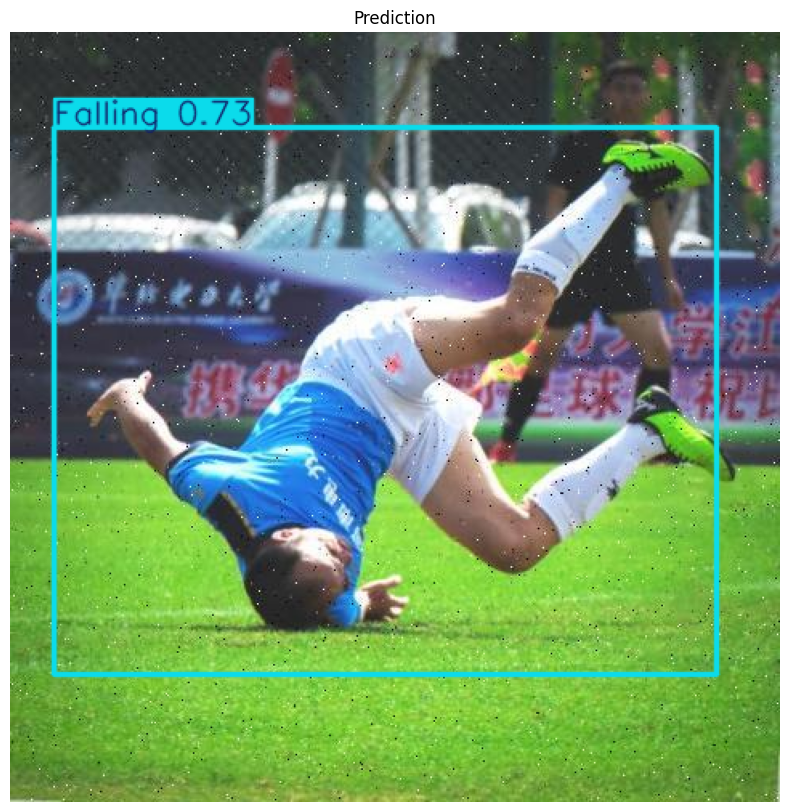

In [12]:
# Upload an image for prediction
print("Please upload an image for prediction:")
uploaded = files.upload()

# Perform prediction on the uploaded image
for filename in uploaded.keys():
    print(f"Running inference on {filename}...")

    # Perform inference without saving
    results = model.predict(source=filename, save=False)

    # Display the original image with predictions
    for result in results:
        img_with_boxes = result.plot()  # Get the image with predictions drawn on it
        plt.figure(figsize=(10, 10))
        plt.imshow(cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
        plt.axis('off')
        plt.title("Prediction")
        plt.show()

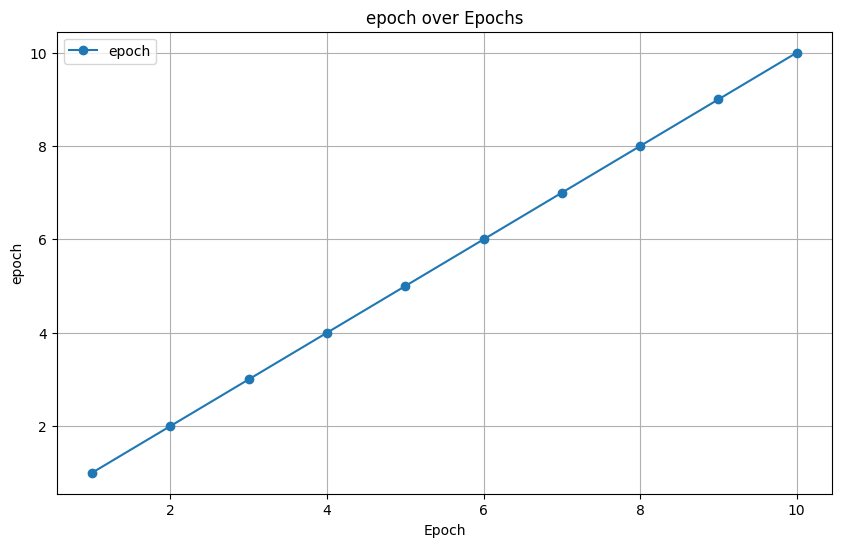

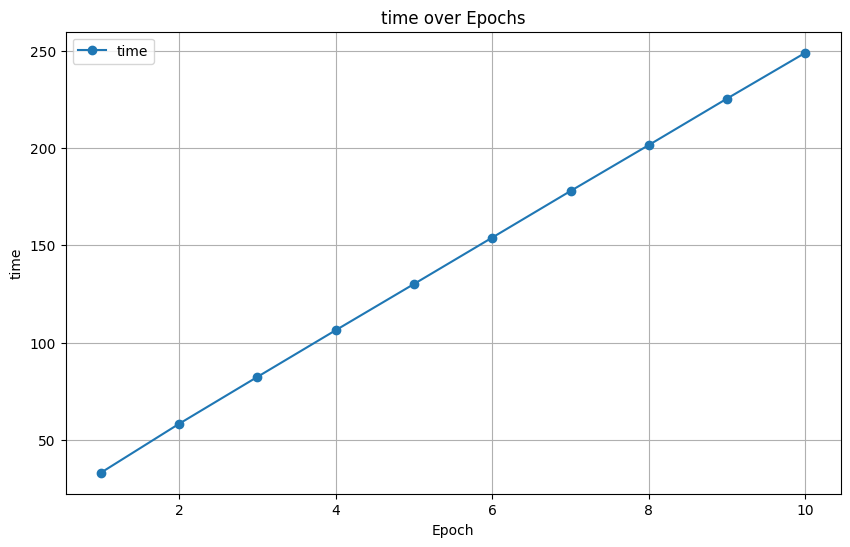

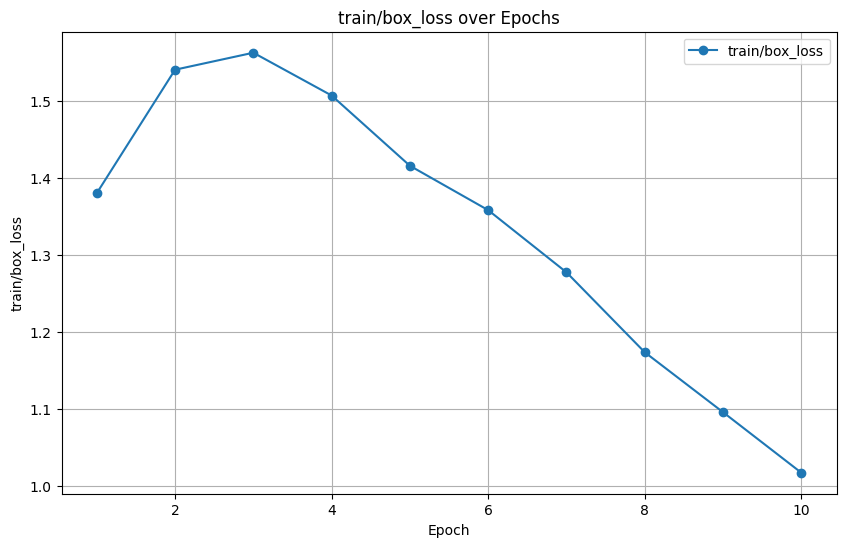

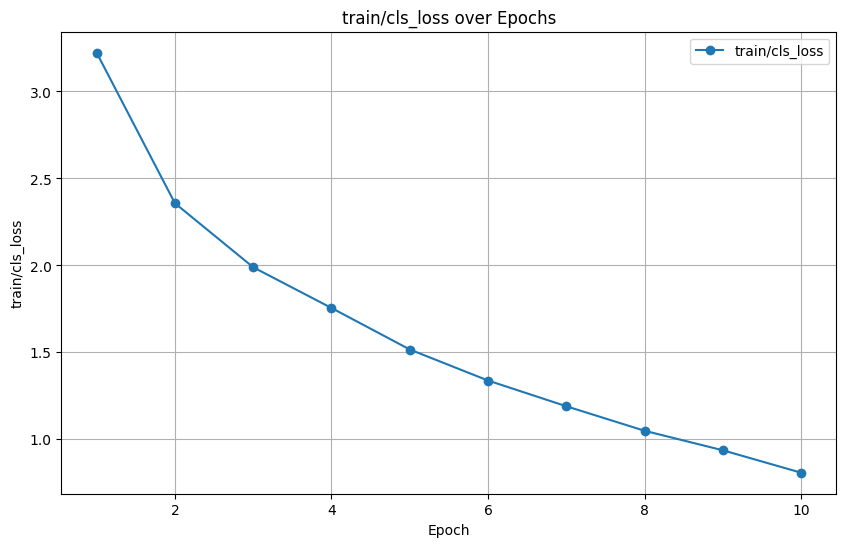

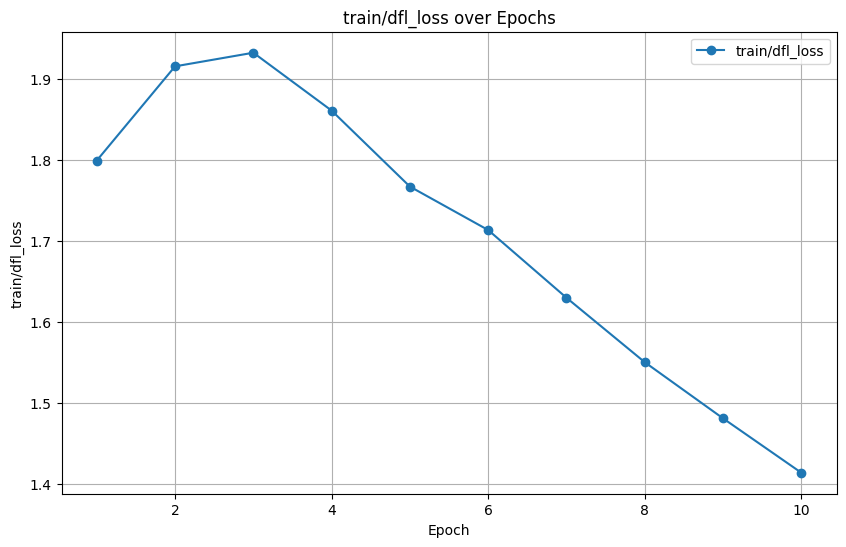

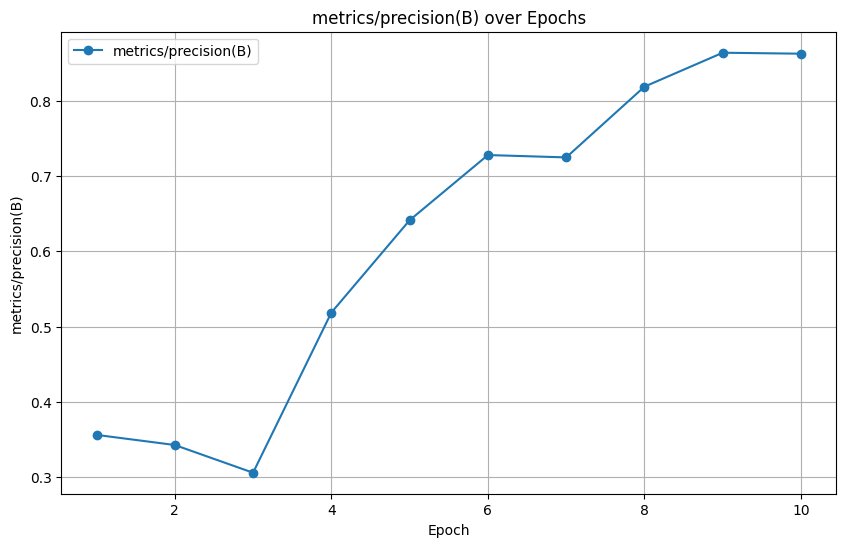

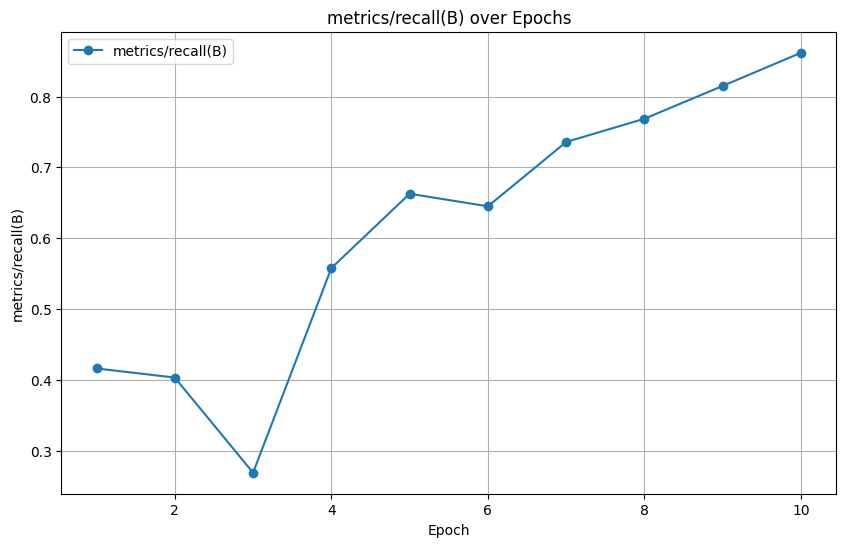

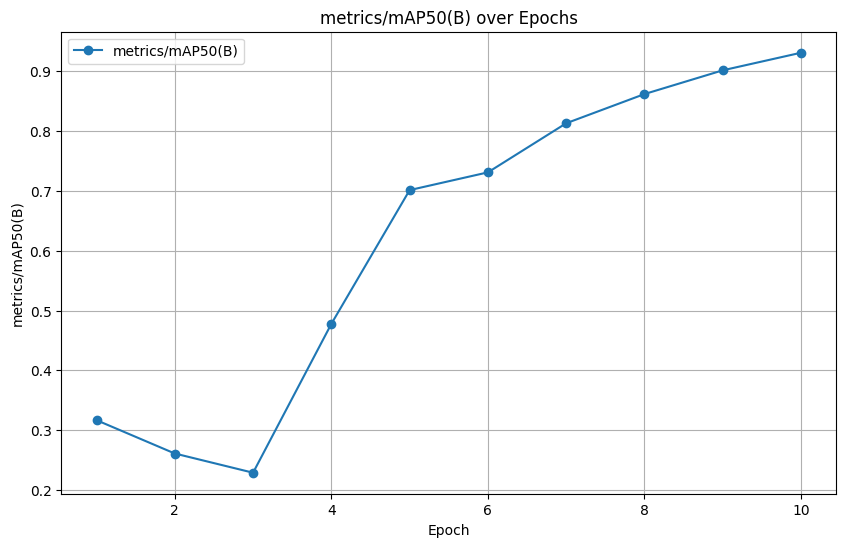

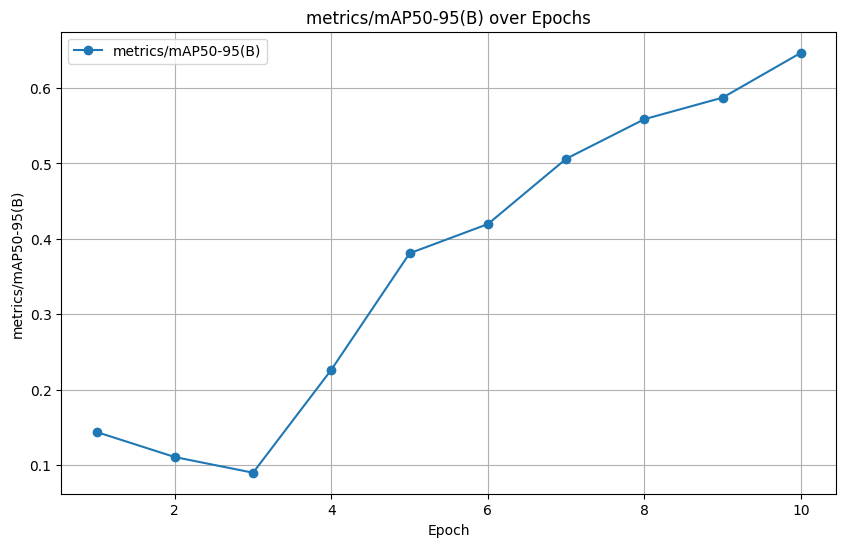

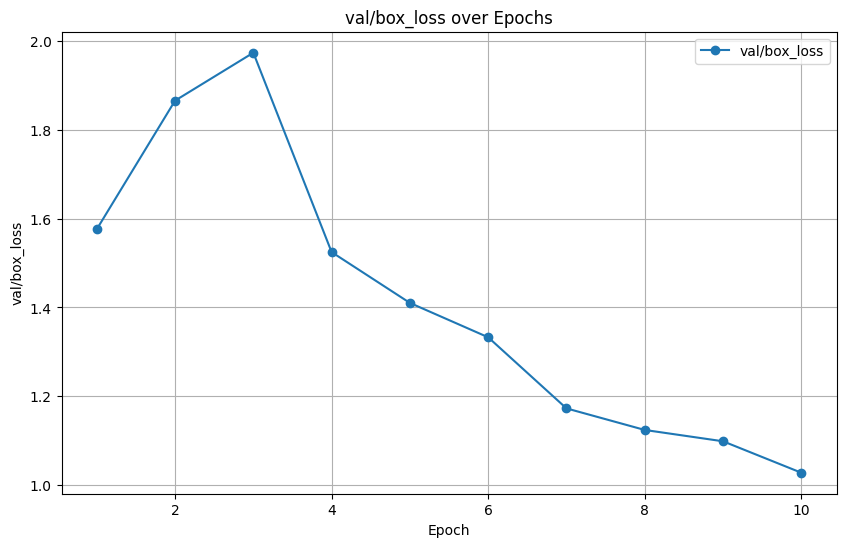

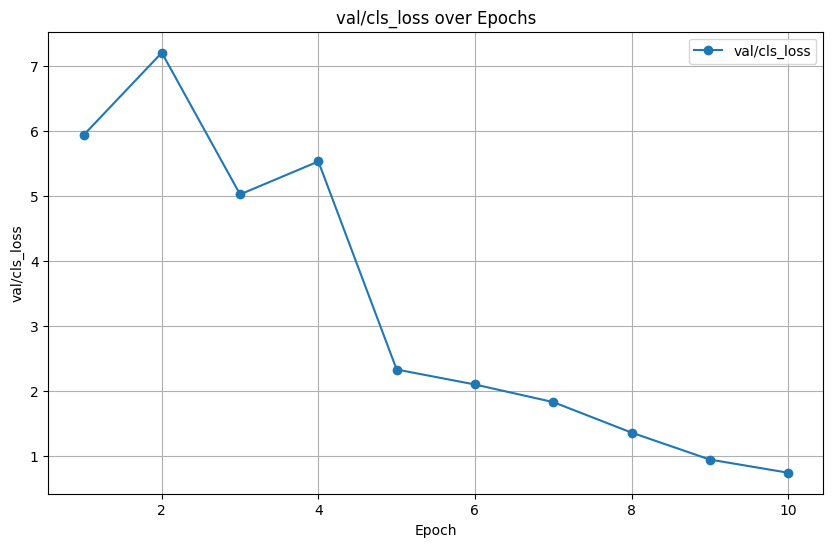

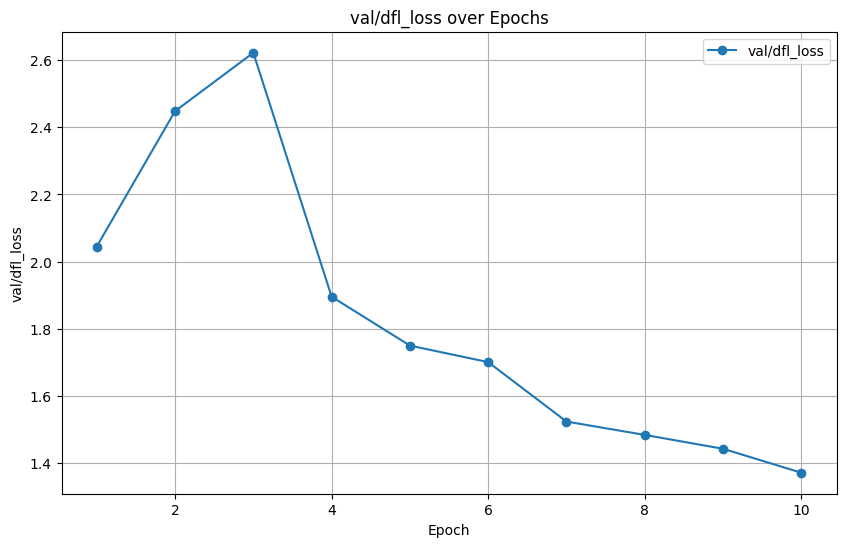

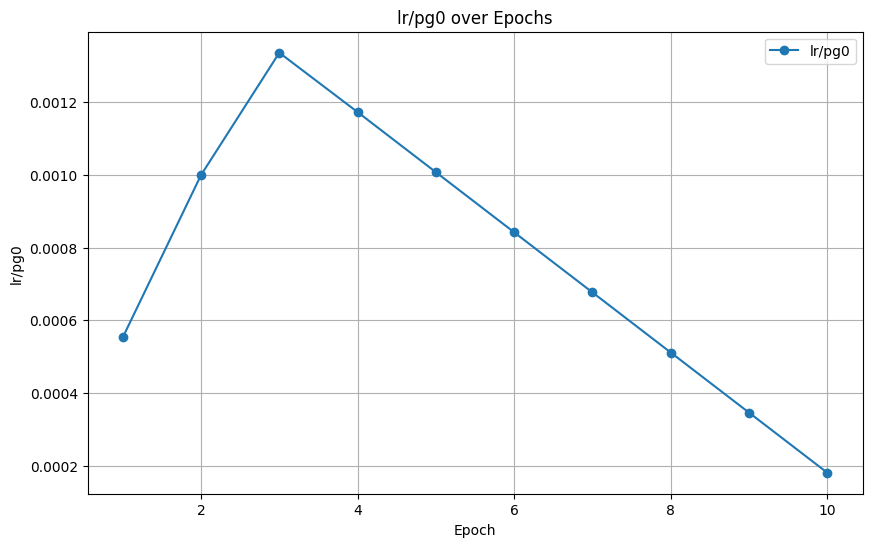

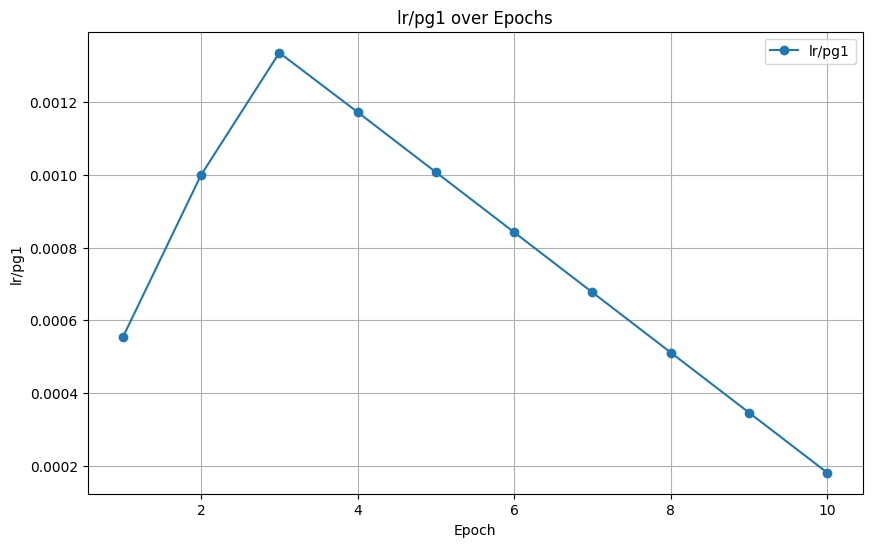

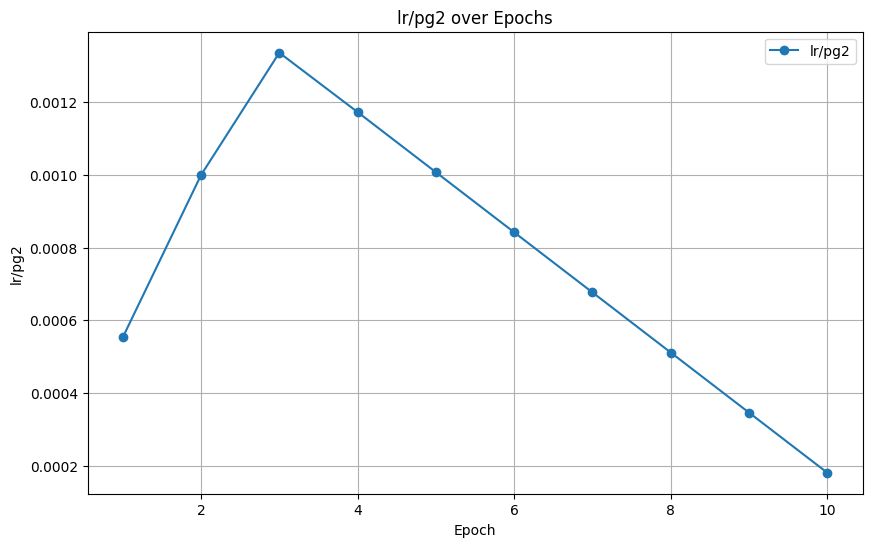

In [14]:
# Load and analyze results.csv (generated after training)
results_csv_path = "/content/human_fall_detection/runs/detect/train/results.csv"  # Ensure this matches the correct path
results_df = pd.read_csv(results_csv_path)

# Plot all numeric columns to visualize trends
numeric_columns = results_df.select_dtypes(include=['float64', 'int64']).columns

# Create separate plots for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    plt.plot(results_df['epoch'], results_df[column], label=column, marker='o')
    plt.title(f'{column} over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel(column)
    plt.legend()
    plt.grid()
    plt.show()


In [15]:
import shutil

# Define source and destination paths
source_path = '/content/human_fall_detection/runs'  # Update this if the runs folder is elsewhere
destination_path = '/content/drive/MyDrive/HUMANFALLDETECTION/runs'

# Copy the runs folder to the specified Google Drive path
shutil.copytree(source_path, destination_path, dirs_exist_ok=True)

print(f"Successfully copied 'runs' folder to {destination_path}.")

Successfully copied 'runs' folder to /content/drive/MyDrive/HUMANFALLDETECTION/runs.
